In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Data Preprocessing

In [16]:
data = pd.read_csv('data.csv')


In [17]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Data Encoding

In [18]:
X_encoded = pd.get_dummies(X, columns=['Gender'])

In [19]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Standard Feature Scaling

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## ANOVA F-Value Feature Selection

In [21]:
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y_encoded)

## Training and Test Data Allocation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)


# Model Training and Prediction

## Hyperparameter Optimization

In [23]:
# param_grid = [
#     {'activation': ['relu', 'tanh', 'logistic', 'identity'],
#      'hidden_layer_sizes': [(100, 50, 25), (50, 25), (25)],
#     'alpha': [0.1, 0.01, 0.001, 0.0001],
#     'solver': ['lbfgs', 'sgd', 'adam'],
#     'learning_rate': ['constant', 'adaptive', 'invscaling']
#      }
# ]

# optimal_params = GridSearchCV(
#     MLPClassifier(max_iter=1000),
#     param_grid,
#     cv = 5,
#     scoring = 'accuracy',
#     verbose = 0
# )

In [24]:
# optimal_params.fit(X_train, y_train)
# print(optimal_params.best_params_)

## Training

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='tanh', alpha=0.1, solver='lbfgs', learning_rate='constant')
mlp.fit(X_train, y_train)

c:\Users\mattm\anaconda3\envs\compbio\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 50, 25),
              solver='lbfgs')

## Prediction

In [26]:
y_pred = mlp.predict(X_test)

# Results

## Decoding

In [27]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

## Confusion Matrix

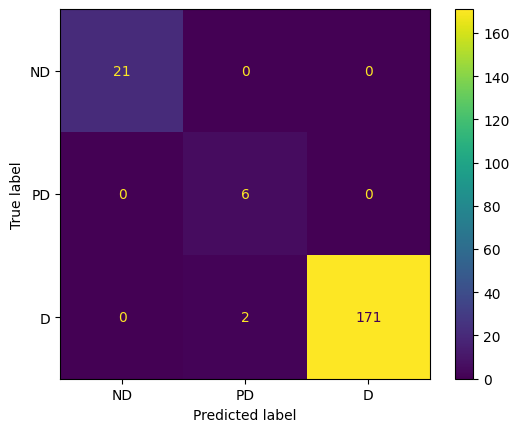

In [28]:
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
cm_fig = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ND', 'PD', 'D'])
cm_fig.plot()
plt.show()

## Classification Report

In [29]:
print(classification_report(y_test_decoded, y_pred_decoded))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00        21
           P       0.75      1.00      0.86         6
           Y       1.00      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.92      1.00      0.95       200
weighted avg       0.99      0.99      0.99       200

